# Pre-processing

In [3]:
setwd("/projects/gilbert_lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017")

In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(viridis)

In [6]:
biom <- import_biom("BIOMfiles/final.alldata.biom")
map <- import_qiime_sample_data("FullMetaData.txt")
tree <- read_tree("make_phylo.tre")
batrun_nt <- merge_phyloseq(biom,tree,map)%>%
    prune_samples((sample_sums(.) > 1000), .)

batrun = merge_phyloseq(biom,tree,map) %>%
    prune_samples((sampleSums(.) > 1000), .) %>%
    transform_sample_counts(function(x) x / sum(x))

Warning message in strsplit(conditionMessage(e), "\n"):
“input string 1 is invalid in this locale”
Warning message:
“'sampleSums' is deprecated.
Use 'sample_sums' instead.
See help("Deprecated") and help("phyloseq-deprecated").”


In [4]:
batrun_nt= readRDS("/projects/gilbert_lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batrun_nt.rds")
batrun = readRDS("/projects/gilbert_lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/RDSfiles/batrun.rds")

In [11]:
rodent_nt = subset_samples(batrun_nt, Host=="Rodent")
shrew_nt = subset_samples(batrun_nt, Host=="Shrew")
both_nt = merge_phyloseq(rodent_nt,shrew_nt)
skin_nt = subset_samples(both_nt, SampleType=="SkinEtOH")
gut_nt = subset_samples(both_nt, SampleType=="FecalFTA")
oral_nt = subset_samples(both_nt, SampleType=="TongueEtOH")

In [62]:
rodent_t = subset_samples(batrun, Host=="Rodent")
shrew_t = subset_samples(batrun, Host=="Shrew")
both_t = merge_phyloseq(rodent_t,shrew_t)
skin_t = subset_samples(both_t, SampleType=="SkinEtOH")
gut_t = subset_samples(both_t, SampleType=="FecalFTA")
oral_t = subset_samples(both_t, SampleType=="TongueEtOH")

In [12]:
oral_nt
skin_nt
data.frame(sample_data(oral_nt)) %>% group_by(Genus, SampleType) %>% summarize(count=n())
data.frame(sample_data(skin_nt)) %>% group_by(Genus, SampleType) %>% summarize(count=n())
data.frame(sample_data(gut_nt)) %>% group_by(Genus, SampleType) %>% summarize(count=n())

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 64644 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 64644 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 64644 tips and 64642 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 64644 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 24 sample variables ]
tax_table()   Taxonomy Table:    [ 64644 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 64644 tips and 64642 internal nodes ]

`summarise()` regrouping output by 'Genus' (override with `.groups` argument)



Genus,SampleType,count
<chr>,<fct>,<int>
Aethomys,TongueEtOH,3
Cricetomys,TongueEtOH,2
Crocidura,TongueEtOH,30
Cryptomys,TongueEtOH,6
Dendromus,TongueEtOH,13
Grammomys,TongueEtOH,8
Graphiurus,TongueEtOH,7
Hylomyscus,TongueEtOH,10
Lemniscomys,TongueEtOH,1


`summarise()` regrouping output by 'Genus' (override with `.groups` argument)



Genus,SampleType,count
<chr>,<fct>,<int>
Aethomys,SkinEtOH,1
Grammomys,SkinEtOH,3
Graphiurus,SkinEtOH,1
Hylomyscus,SkinEtOH,10
Lophuromys,SkinEtOH,16
Mastomys,SkinEtOH,4
Mus,SkinEtOH,3
Myomyscus,SkinEtOH,1
Praomys,SkinEtOH,48


`summarise()` regrouping output by 'Genus' (override with `.groups` argument)



Genus,SampleType,count
<chr>,<fct>,<int>
Crocidura,FecalFTA,7
Grammomys,FecalFTA,2
Graphiurus,FecalFTA,3
Hylomyscus,FecalFTA,5
Lophuromys,FecalFTA,3
Mus,FecalFTA,1
Otomys,FecalFTA,1
Praomys,FecalFTA,14


In [27]:
bird_nt = subset_samples(batrun_nt, Host=="Bird")
birdgut_nt = subset_samples(bird_nt, SampleType=="FecalFTA")
birdoral_nt = subset_samples(bird_nt, SampleType=="TongueEtOH")

# Alpha Diversity

In [116]:
sha = estimate_richness(oral_nt, split = TRUE, measures = "Shannon")
sha$SampleID = rownames(sha)

sample_tab = (data.frame(sample_data(oral_t))) 
sample_tab['sample_id'] <- row.names(sample_tab)

dfsha = merge(sha, sample_tab, on="SampleID")

dfsha$Shannon = as.numeric(dfsha$Shannon)

stats = dfsha %>%
    group_by(Host_Genus) %>%
    summarize(median = median(Shannon),
              mean = mean(Shannon),
              sd = sd(Shannon),
              sem = sd(Shannon/sqrt(length(Shannon)))) %>%
    arrange(-desc(mean))
stats

stats.krusk = kruskal.test(Shannon~Host_Genus, data=dfsha)
stats.krusk

`summarise()` ungrouping output (override with `.groups` argument)



Host_Genus,median,mean,sd,sem
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Aethomys,1.871588,1.735249,0.3353320,0.1936040
Mus,1.446063,1.771897,1.2600828,0.3253520
Lemniscomys,2.104620,2.104620,NA,NA
Praomys,2.442512,2.844224,1.2268802,0.1445892
Myomyscus,2.176598,3.033768,1.8093856,1.0446493
Hylomyscus,3.350107,3.082592,0.9168559,0.2899353
Graphiurus,3.681883,3.129041,1.3134543,0.4964391
Lophuromys,2.682745,3.282640,1.6059097,0.2714483
Mastomys,2.966607,3.354434,1.4501017,0.5920016



	Kruskal-Wallis rank sum test

data:  Shannon by Host_Genus
Kruskal-Wallis chi-squared = 25.221, df = 14, p-value = 0.03245


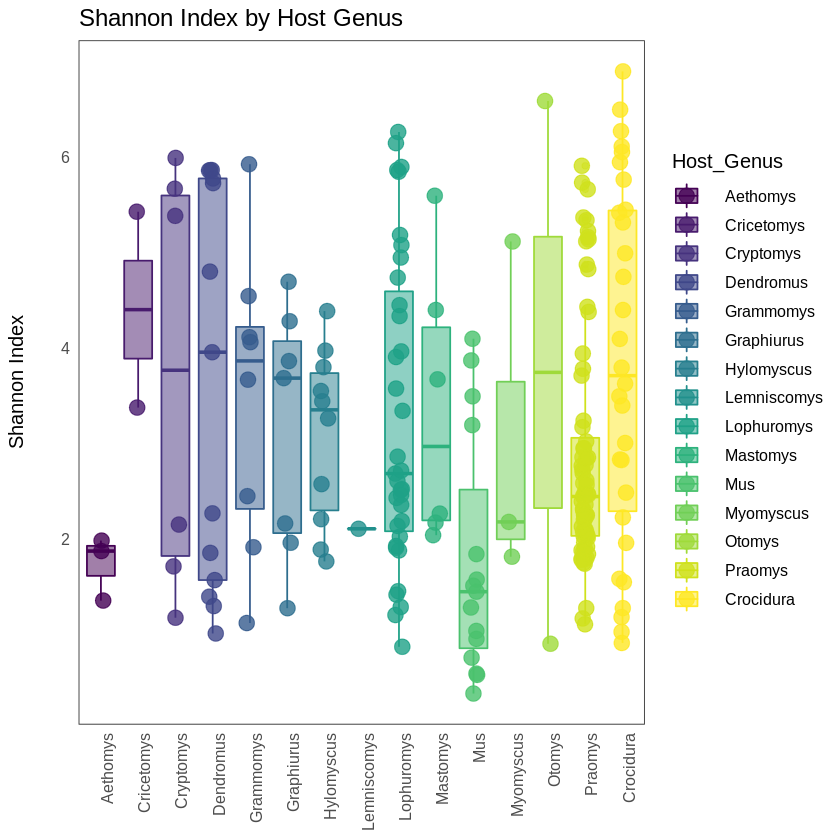

In [119]:
p = ggplot(dfsha, aes(x = Host_Genus, y = Shannon, fill=Host_Genus, color=Host_Genus)) + ggtitle("Shannon Index by Host Genus")

p = p + geom_boxplot(alpha = 0.5) + ylab("Shannon Index") +
    scale_fill_viridis(discrete=TRUE) #+
    #scale_y_continuous(limits=c(2,4.5))

p = p + geom_point(size = 4, position = position_jitter(h = 0, w = 0.1), alpha = 0.8) +
    scale_color_viridis(discrete=TRUE)

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=12, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              #axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              axis.text.x=element_text(angle=90,hjust=1),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())
p

#png('/home/holutz/projects/DolphinMP/Phase1/Plots/ShannonIndex.status.boxplot.png', width=6, height=6, units='in', res=300)
#plot(p)
#dev.off()

# Beta Diversity

## Distance calculations

In [60]:
oral.dist.wunif = readRDS("/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.wuf.dist.rds")
oral.out.wuf.log = readRDS("/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.wuf.log.rds")
oral.bdisp.wuf2 = readRDS("/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.beta.disp.wuf.rds")
oral.dist.unif = readRDS("/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.uf.dist.rds")
oral.out.uf.log = readRDS("/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.uf.log.rds")
oral.bdisp.uf2 = readRDS("/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.beta.disp.uf.rds")

oral.dist.wunif <- distance(oral_t, method = "wunifrac", type = "samples")
oral.out.wuf.log <- ordinate(oral_t, method = "PCoA", distance = "wunifrac")
oral.wuf.evals <- oral.out.wuf.log$values$Eigenvalues

sample_tab = (data.frame(sample_data(oral_t)))
sample_tab['sample_id'] <- row.names(sample_tab)

beta.disp.wuf = betadisper(oral.dist.wunif, group = sample_data(oral_nt)$Host_Genus)
beta.disp.wuf = beta.disp.wuf$distances
beta.disp.wuf = data.frame(d = beta.disp.wuf, sample_id = names(beta.disp.wuf))
beta.disp.wuf2 = left_join(beta.disp.wuf, sample_tab, by="sample_id")

saveRDS(oral.dist.wunif, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.wuf.dist.rds")
saveRDS(oral.out.wuf.log, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.wuf.log.rds")
saveRDS(beta.disp.wuf2, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.beta.disp.wuf.rds")

oral.dist.unif <- distance(oral_t, method = "unifrac", type = "samples")
oral.out.uf.log <- ordinate(oral_nt, method = "PCoA", distance = "unifrac")
oral.uf.evals <- oral.out.uf.log$values$Eigenvalues

beta.disp.uf = betadisper(oral.dist.unif, group = sample_data(oral_nt)$Host_Genus)
beta.disp.uf = beta.disp.uf$distances
beta.disp.uf = data.frame(d = beta.disp.uf, sample_id = names(beta.disp.uf))
beta.disp.uf2 = left_join(beta.disp.uf, sample_tab, by="sample_id")

saveRDS(oral.dist.unif, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.uf.dist.rds")
saveRDS(oral.out.uf.log, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.uf.log.rds")
saveRDS(beta.disp.uf2, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/oral.beta.disp.uf.rds")

skin.dist.wunif <- distance(skin_t, method = "wunifrac", type = "samples")
skin.out.wuf.log <- ordinate(skin_t, method = "PCoA", distance = "wunifrac")
skin.wuf.evals <- skin.out.wuf.log$values$Eigenvalues

sample_tab = (data.frame(sample_data(skin_t)))
sample_tab['sample_id'] <- row.names(sample_tab)

beta.disp.wuf = betadisper(skin.dist.wunif, group = sample_data(skin_nt)$Host_Genus)
beta.disp.wuf = beta.disp.wuf$distances
beta.disp.wuf = data.frame(d = beta.disp.wuf, sample_id = names(beta.disp.wuf))
beta.disp.wuf2 = left_join(beta.disp.wuf, sample_tab, by="sample_id")

saveRDS(skin.dist.wunif, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/skin.wuf.dist.rds")
saveRDS(skin.out.wuf.log, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/skin.wuf.log.rds")
saveRDS(beta.disp.uf2, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/skin.beta.disp.wuf.rds")

skin.dist.unif <- distance(skin_t, method = "unifrac", type = "samples")
skin.out.uf.log <- ordinate(skin_nt, method = "PCoA", distance = "unifrac")
skin.uf.evals <- skin.out.uf.log$values$Eigenvalues

beta.disp.uf = betadisper(skin.dist.unif, group = sample_data(skin_nt)$Host_Genus)
beta.disp.uf = beta.disp.uf$distances
beta.disp.uf = data.frame(d = beta.disp.uf, sample_id = names(beta.disp.uf))
beta.disp.uf2 = left_join(beta.disp.uf, sample_tab, by="sample_id")

saveRDS(skin.dist.wunif, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/skin.uf.dist.rds")
saveRDS(skin.out.wuf.log, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/skin.uf.log.rds")
saveRDS(beta.disp.uf2, "/projects/gilbert_lab/Lutz/Rodent_Shrew/Bdiv/skin.beta.disp.uf.rds")

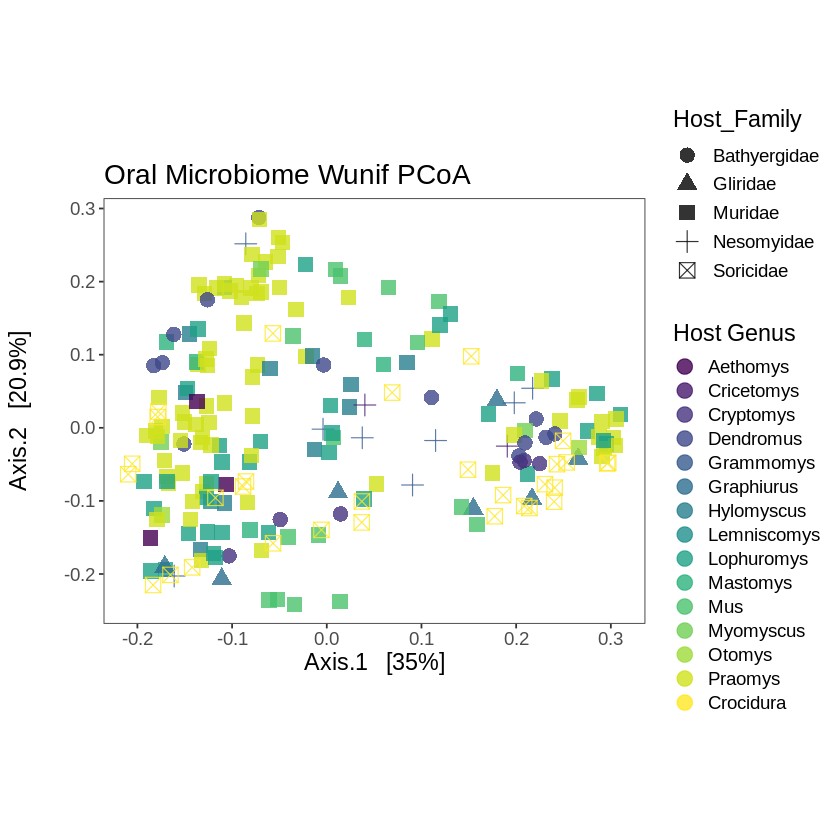

In [56]:
p = plot_ordination(oral_nt, oral.out.wuf.log, color = "Host_Genus", shape = "Host_Family") + 
    ggtitle("Oral Microbiome Wunif PCoA") + 
    geom_point(size=4, alpha=0.8) + 
    #geom_path(data=oral_nt, aes(x=x, y=y, colour=Genus)
    scale_colour_viridis(discrete=TRUE) +
    coord_fixed(sqrt(oral.wuf.evals[2] / oral.wuf.evals[1]))

p = p + guides(colour = guide_legend(title = "Host Genus", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + 
        theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=14, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              legend.position = "right")

p$layers <- p$layers[-1]
p

In [69]:
avg_obs <- aggregate(d ~ Host_Genus, data = oral.bdisp.wuf2, mean)
oral.bdisp.wuf2$Host_Genus <-factor(oral.bdisp.wuf2$Host_Genus, levels=avg_obs[order(avg_obs$d), "Host_Genus"])

wuf2.betadisper.kw = kruskal.test(d~Host_Genus, data=oral.bdisp.wuf2)
wuf2.betadisper.kw


	Kruskal-Wallis rank sum test

data:  d by Host_Genus
Kruskal-Wallis chi-squared = 47.061, df = 14, p-value = 1.878e-05


png 
  2

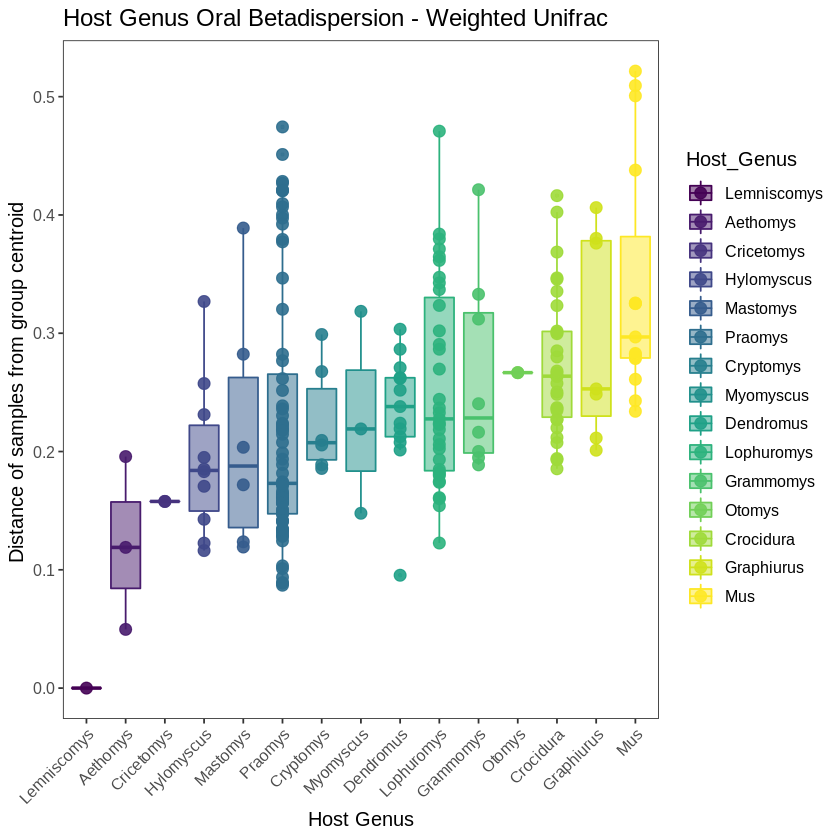

In [68]:
p = ggplot(oral.bdisp.wuf2, aes(x = Host_Genus, y = d, fill = Host_Genus, color = Host_Genus)) + ggtitle("Host Genus Oral Betadispersion - Weighted Unifrac")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, alpha = 0.5) + 
        ylab("Distance of samples from group centroid ") + 
        xlab("Host Genus") +
        #scale_y_continuous(limits=c(0,0.15)) +
        scale_fill_viridis(discrete=TRUE)
        #scale_fill_manual(values=c("cadetblue1", "cadetblue4"))
        #coord_flip(ylim = c(0,0.15))

p = p + geom_point(size = 3, position = position_jitter(h = 0, w = 0), alpha = 0.9) +
    scale_color_viridis(discrete=TRUE)

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="right",
                           axis.text.x = element_text(angle = 45, hjust=1))
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

p

png('/projects/gilbert_lab/Lutz/Rodent_Shrew/Plots/oral.bdisp.wunif.viridis.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

In [70]:
avg_obs <- aggregate(d ~ Host_Genus, data = oral.bdisp.uf2, mean)
oral.bdisp.uf2$Host_Genus <-factor(oral.bdisp.uf2$Host_Genus, levels=avg_obs[order(avg_obs$d), "Host_Genus"])

uf2.betadisper.kw = kruskal.test(d~Host_Genus, data=oral.bdisp.uf2)
uf2.betadisper.kw


	Kruskal-Wallis rank sum test

data:  d by Host_Genus
Kruskal-Wallis chi-squared = 49.116, df = 14, p-value = 8.581e-06


png 
  2

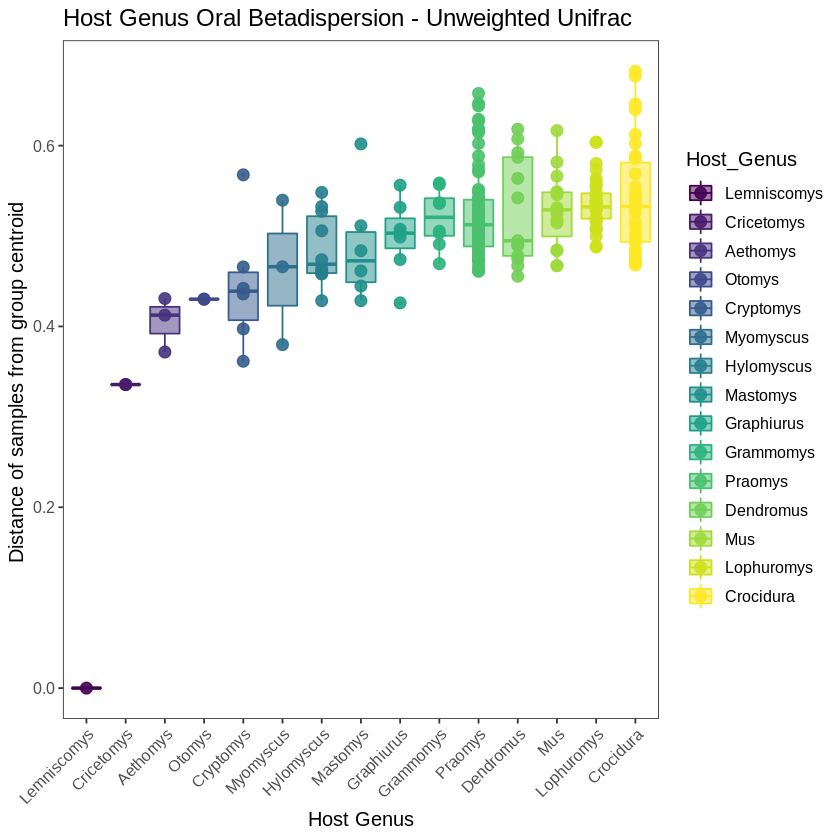

In [71]:
p = ggplot(oral.bdisp.uf2, aes(x = Host_Genus, y = d, fill = Host_Genus, color = Host_Genus)) + ggtitle("Host Genus Oral Betadispersion - Unweighted Unifrac")

p = p + geom_boxplot(outlier.stroke = 0.2, outlier.shape=20, alpha = 0.5) + 
        ylab("Distance of samples from group centroid ") + 
        xlab("Host Genus") +
        #scale_y_continuous(limits=c(0,0.15)) +
        scale_fill_viridis(discrete=TRUE)
        #scale_fill_manual(values=c("cadetblue1", "cadetblue4"))
        #coord_flip(ylim = c(0,0.15))

p = p + geom_point(size = 3, position = position_jitter(h = 0, w = 0), alpha = 0.9) +
    scale_color_viridis(discrete=TRUE)

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family = "Arial"),
                           legend.key = element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="right",
                           axis.text.x = element_text(angle = 45, hjust=1))
                           #axis.title.x=element_blank(),
                           #axis.title.y=element_text(margin=margin(0,10,0,0)))

p

png('/projects/gilbert_lab/Lutz/Rodent_Shrew/Plots/oral.bdisp.unif.viridis.png', width=6, height=5, units='in', res=300)
plot(p)
dev.off()

In [72]:
oral.mdf = read.csv("/projects/gilbert_lab/Lutz/Rodent_Shrew/RDSfiles/oral.t.mdf.csv")

In [111]:
mdfall.other$Rank5.other[mdfall.other$Rank5.other == 'f__'] <- 'Other'
mdfall.other$Rank5.other[mdfall.other$Rank5.other == 'NA'] <- 'Other'

mdfall.other

Sample,Host_Genus,Rank5.other,Abundance
<chr>,<fct>,<chr>,<dbl>
JCK.10002.TongueEtOH.2,Lophuromys,f__Gemellaceae,0
JCK.10005.TongueEtOH.2,Lophuromys,f__Gemellaceae,0
JCK.10005.TongueEtOH.2,Lophuromys,f__Neisseriaceae,0
JCK.10007.TongueEtOH.2,Praomys,f__Gemellaceae,0
JCK.10010.TongueEtOH.1,Cricetomys,f__Gemellaceae,0
JCK.10010.TongueEtOH.2,Cricetomys,f__Gemellaceae,0
JCK.10015.TongueEtOH.1,Crocidura,f__Corynebacteriaceae,0
JCK.10015.TongueEtOH.1,Crocidura,f__Gemellaceae,0
JCK.10015.TongueEtOH.1,Crocidura,f__Neisseriaceae,0


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Selecting by m

`summarise()` regrouping output by 'Sample', 'Host_Genus' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



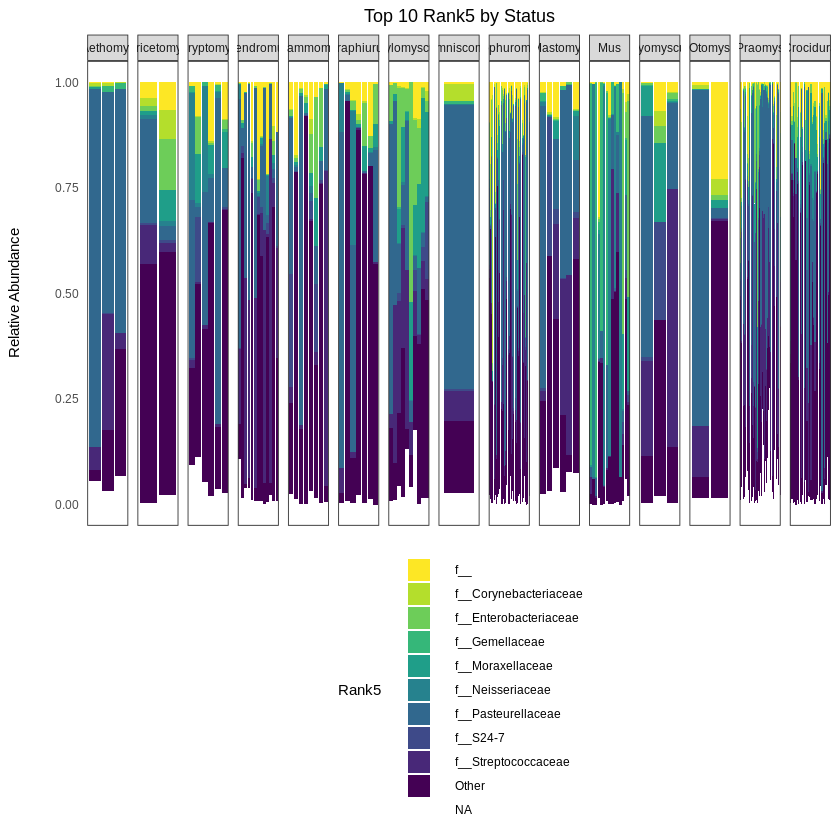

In [92]:
N = 11

topN = oral.mdf %>%
    group_by(Rank5) %>%
    summarize(Abundance = sum(Abundance)) %>%
    group_by(Rank5) %>%
    summarize(m = mean(Abundance)) %>%
    top_n(N) %>%
    arrange(desc(m)) %>%
    magrittr::extract2("Rank5")

mdfall.other = oral.mdf %>%
    mutate(Rank5.other = ifelse(Rank5 %in% topN, as.character(Rank5), "Other")) %>%
    group_by(Sample, Host_Genus, Rank5.other) %>%
    summarize(Abundance = sum(Abundance)) %>%
    arrange(Abundance)

mdfall.summary = mdfall.other %>%
    group_by(Rank5.other) %>%
    summarise(avg = mean(Abundance), 
              sd = sd(Abundance), 
              sem = sd/sqrt(length(Abundance)),
              abundance = round(avg*100,2)) %>%
    arrange(Rank5.other)

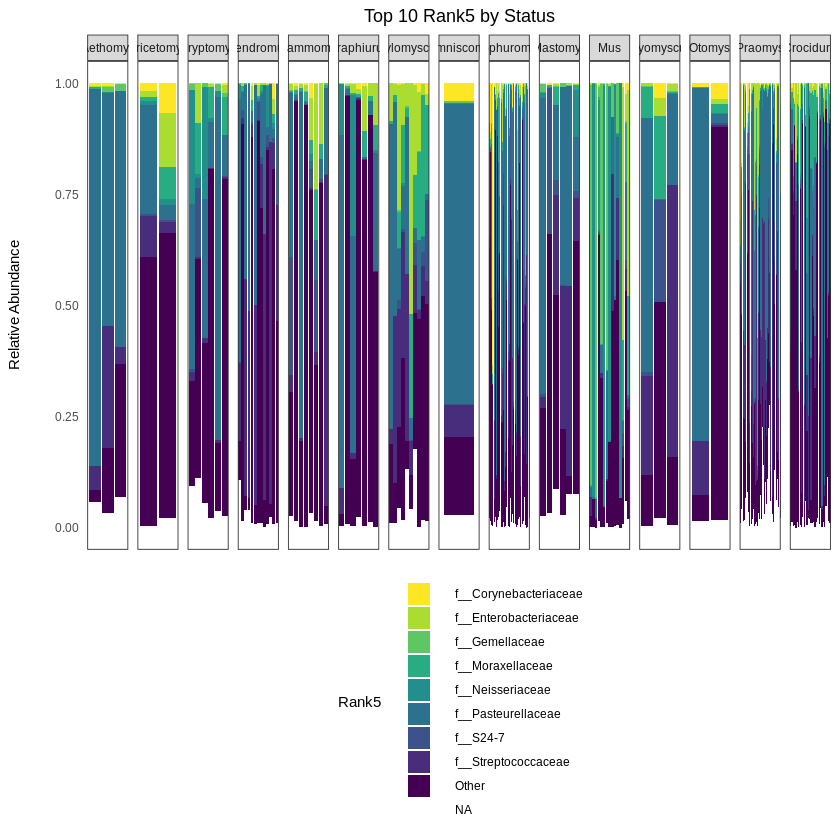

In [109]:
p = ggplot(mdfall.other[order(mdfall.other$Rank5.other),], aes(x=Sample, y = Abundance, fill = Rank5.other))
                        
p = p + facet_wrap(~Host_Genus, shrink = TRUE, scales = "free_x",nrow=1) +
    ylab("Relative Abundance")  +
    geom_bar(stat="identity") +
    scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1) #    scale_y_continuous(expand = c(0,0))

p = p + guides(fill = guide_legend(title = "Rank5", ncol = 1, keywidth = 1, keyheight = 1))

p = p + theme_bw() + theme(panel.grid.major = element_blank(),
              axis.title.y=element_text(margin=margin(0,20,0,0)),
              text=element_text(size=9, color="black",family="Arial"),
              panel.grid.minor = element_blank(),
              axis.text.x = element_blank(),
              axis.ticks = element_blank(),
              #axis.text.x=element_text(angle=90,vjust=0.4),
              #legend.key.size = unit(.25, "mm"),
              legend.spacing.x = unit(.2,"in"),
              axis.title.x=element_blank())

p = p + theme(legend.position="bottom")

p = p + ggtitle("Top 10 Rank5 by Status") + theme(plot.title = element_text(hjust = 0.5))

p

#png('/home/holutz/projects/DolphinMP/Phase1/Plots/RelAbund.Status.Rank5.png', width=10, height=8, units='in', res=300)
#plot(p)
#dev.off()

SampleID,Host_Genus,Rank2,Phylum.other,avg,sd,sem,proportion
JCK.10143.SkinEtOH,Graphiurus,p__Proteobacteria,p__Proteobacteria,0.9886136,NA,NA,98.86
JCK.9941.SkinEtOH,Mastomys,p__Proteobacteria,p__Proteobacteria,0.8999139,NA,NA,89.99
JCK.9913.SkinEtOH,Praomys,p__Actinobacteria,p__Actinobacteria,0.8567128,NA,NA,85.67
JCK.9976.SkinEtOH,Praomys,p__Actinobacteria,p__Actinobacteria,0.8483063,NA,NA,84.83
JCK.9954.SkinEtOH,Praomys,p__Actinobacteria,p__Actinobacteria,0.7845129,NA,NA,78.45
JCK.9918.SkinEtOH,Praomys,p__Proteobacteria,p__Proteobacteria,0.7767982,NA,NA,77.68
JCK.9947.SkinEtOH,Grammomys,p__Actinobacteria,p__Actinobacteria,0.7659975,NA,NA,76.60
JCK.9985.SkinEtOH,Mastomys,p__Proteobacteria,p__Proteobacteria,0.7626946,NA,NA,76.27
JCK.9957.SkinEtOH,Praomys,p__Actinobacteria,p__Actinobacteria,0.7227315,NA,NA,72.27
JCK.10342.SkinEtOH,Hylomyscus,p__Proteobacteria,p__Proteobacteria,0.7040629,NA,NA,70.41


Warning message:
"Ignoring unknown aesthetics: y"Warning message:
"Removed 2680 rows containing missing values (geom_bar)."Warning message:
"Removed 5133 rows containing missing values (geom_errorbar)."

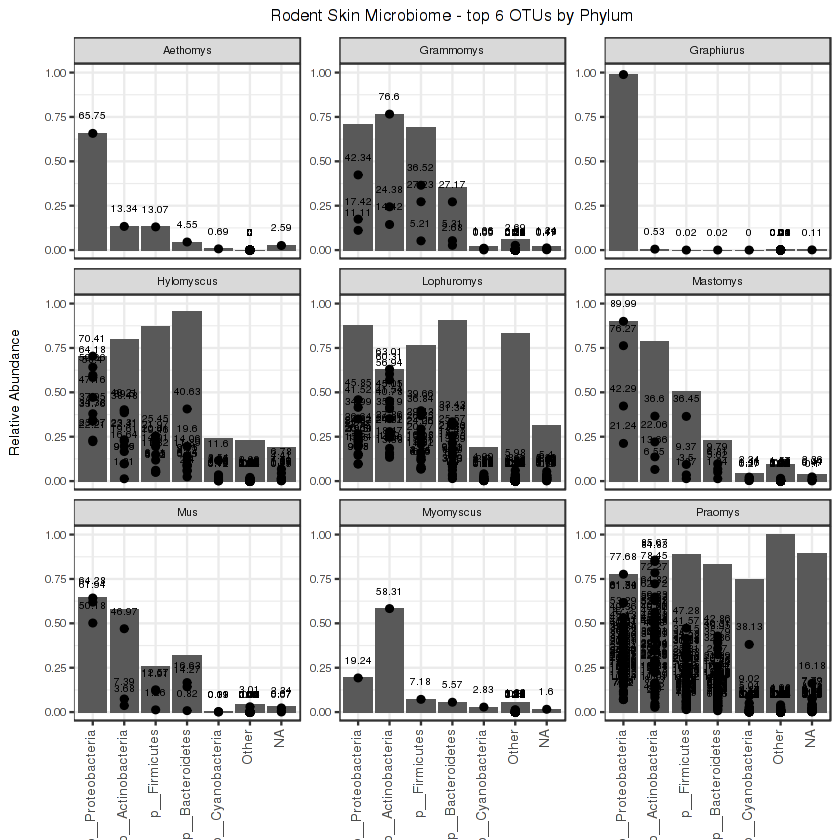

In [26]:
sitenames = c('Kaboga cave Gede' = "Kaboga",
              'Karamoja Provence; Kaabong District; Mout Morungole; Uganda' = "Karamoja",
              'Monkey Bridge campsite Soysambu Conservancy' = "Soysambu",
              'Lirhanda cave Kakamega Forest' = "Lirhanda",
              'Mahiakalo cave Kakamega Forest' = "Mahiakalo",
              'Makuruhu cave Gede' = "Makuruhu",
              'Lion Hill cave Lake Nakuru National Park' = "Lion Hill",
              'Buzambuli Trail 3 Kakamega Forest National Reserve' = "Buzambuli",
              'Pipeline cave Gilgil' = "Gilgil",
              'Makingeny cave Mount Elgon National Park' = "Mt. Elgon",
              'Kitum cave Mount Elgon National Park' = "Kitum",
              'Kariandusi mines Gilgil' = "Kariandusi",
              'Diatomite cave Gilgil' = "Diatomite",
              'Acholi Region; Lamwo District; Agoro-Agu Forest Reserve; Uganda'= "Acholi",
              'Guano cave 3 Chyulu Hills National Park' = "Chyulu"
              )

p2 = ggplot(mdf.summary, aes(x= reorder(Phylum.other,-avg), y = avg)) 

p2 = p2 + geom_bar(stat="identity")#, fill="white", colour="black", width=.8, size=.5)

p2 = p2 + facet_wrap(~Host_Genus, scales = "free_y") + xlab("Phylum") + ylab("Relative Abundance")

p2 = p2 + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.25, size = 8),
                           text=element_text(size=8, color="black", family="Arial"),
                           legend.position="none",
                           axis.title.x=element_blank(),
                           axis.title.y=element_text(margin=margin(0,15,0,0)))

p2 = p2 + geom_point(aes(y = avg), data = mdf.summary) +
    geom_errorbar(aes(y = avg, ymin = avg-(sd), ymax = avg+(sd)), 
                , color = "black", width = 0.2, size=.3, data = mdf.summary)

p2 = p2 + scale_y_continuous(limits = c(0, 1))

p2 = p2 + ggtitle("Rodent Skin Microbiome - top 6 OTUs by Phylum")
p2 = p2 + theme(plot.title = element_text(hjust = .5), legend.position="none")

p2 = p2 + geom_text(aes(x=Phylum.other, label=proportion), vjust = -2, size=2) 

p2